## COVID severity vs stringency measures by country

The purpose of this exercise is to try to identify whether the lockdown measures have had any effect in reducing deaths from COVID-19.  I am using data downloaded from https://ourworldindata.org/policy-responses-covid, which contains a 'stringency index', which is "published and managed by researchers at the Blavatnik School of Government at the University of Oxford".  I have not attempted to verify whether this data is accurate or not.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

Load dataset

In [52]:
df = pd.read_csv('/Users/josevans/Downloads/owid-covid-data.csv', low_memory=False)

In [53]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [54]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [55]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

In [56]:
df.date = pd.to_datetime(df.date)

## Data Prep

I'm primarily interested in deaths vs the stringency index, so will drop as many extraneous columns as possible and then explore missing values

In [57]:
cols_to_drop = ['new_cases',
       'new_cases_smoothed', 'new_deaths',
       'new_deaths_smoothed',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
        'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units',
       'population',
       'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']

In [58]:
df = df.drop(cols_to_drop, axis=1)
df.describe()

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density,median_age,aged_65_older,aged_70_older
count,4.882200e+04,4.882200e+04,48536.000000,48536.000000,40949.000000,46890.000000,44054.000000,43396.000000,43825.000000
mean,1.154113e+05,4.429453e+03,2136.683605,61.968315,57.191173,359.102971,31.286065,9.236436,5.840568
std,1.193174e+06,4.105652e+04,4438.924628,148.614614,27.109190,1648.440357,9.028947,6.312631,4.309642
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.137000,15.100000,1.144000,0.526000
25%,7.000000e+01,1.000000e+00,38.273000,0.061000,38.890000,37.728000,23.300000,3.552000,2.142000
50%,1.168000e+03,2.300000e+01,319.597000,5.716000,62.500000,88.125000,31.100000,6.981000,4.393000
75%,1.294600e+04,2.710000e+02,2216.936250,40.694000,79.630000,214.243000,39.700000,14.762000,9.473000
max,3.728791e+07,1.073675e+06,44351.037000,1237.551000,100.000000,19347.500000,48.200000,27.049000,18.493000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49437 entries, 0 to 49436
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  49151 non-null  object        
 1   continent                 48865 non-null  object        
 2   location                  49437 non-null  object        
 3   date                      49437 non-null  datetime64[ns]
 4   total_cases               48822 non-null  float64       
 5   total_deaths              48822 non-null  float64       
 6   total_cases_per_million   48536 non-null  float64       
 7   total_deaths_per_million  48536 non-null  float64       
 8   stringency_index          40949 non-null  float64       
 9   population_density        46890 non-null  float64       
 10  median_age                44054 non-null  float64       
 11  aged_65_older             43396 non-null  float64       
 12  aged_70_older     

In [60]:
df1 = df[df.isna().any(axis=1)]
df1

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density,median_age,aged_65_older,aged_70_older
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,NaN,54.422,18.6,2.581,1.337
63,AFG,Asia,Afghanistan,2020-03-03,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337
64,AFG,Asia,Afghanistan,2020-03-04,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337
65,AFG,Asia,Afghanistan,2020-03-05,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337
66,AFG,Asia,Afghanistan,2020-03-06,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49432,NaN,NaN,International,2020-10-07,696.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49433,NaN,NaN,International,2020-10-08,696.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49434,NaN,NaN,International,2020-10-09,696.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49435,NaN,NaN,International,2020-10-10,696.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


World and international data are not helpful initially, but may be for comparison purposes later, so for now I will drop them, along with any countries for which I am missing stringency data.

In [61]:
df1 = df1[~df1.location.isin(['World', 'International'])]
df1 = df1[~df1.stringency_index.isna()]
df1

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density,median_age,aged_65_older,aged_70_older
63,AFG,Asia,Afghanistan,2020-03-03,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337
64,AFG,Asia,Afghanistan,2020-03-04,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337
65,AFG,Asia,Afghanistan,2020-03-05,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337
66,AFG,Asia,Afghanistan,2020-03-06,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337
67,AFG,Asia,Afghanistan,2020-03-07,NaN,NaN,NaN,NaN,27.78,54.422,18.6,2.581,1.337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47697,VEN,South America,Venezuela,2020-06-18,NaN,NaN,NaN,NaN,72.22,36.253,29.0,6.614,3.915
47876,VNM,Asia,Vietnam,2020-03-03,NaN,NaN,NaN,NaN,47.22,308.127,32.6,7.150,4.718
47877,VNM,Asia,Vietnam,2020-03-04,NaN,NaN,NaN,NaN,47.22,308.127,32.6,7.150,4.718
47878,VNM,Asia,Vietnam,2020-03-05,NaN,NaN,NaN,NaN,47.22,308.127,32.6,7.150,4.718


I thnk it's fairly likely that a lot of the missing data is early dated, in which case I can drop it, so I will filter here by date to check whether I am correct or not.

In [62]:
df1[df1.date > '2020-04']

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density,median_age,aged_65_older,aged_70_older
814,AND,Europe,Andorra,2020-04-02,390.0,14.0,5047.564,181.195,48.15,163.755,NaN,NaN,NaN
815,AND,Europe,Andorra,2020-04-03,428.0,15.0,5539.377,194.137,48.15,163.755,NaN,NaN,NaN
816,AND,Europe,Andorra,2020-04-04,439.0,16.0,5681.745,207.080,48.15,163.755,NaN,NaN,NaN
817,AND,Europe,Andorra,2020-04-05,466.0,17.0,6031.191,220.022,48.15,163.755,NaN,NaN,NaN
818,AND,Europe,Andorra,2020-04-06,501.0,18.0,6484.178,232.964,48.15,163.755,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45442,TCA,North America,Turks and Caicos Islands,2020-08-29,490.0,3.0,12655.612,77.483,53.70,37.312,NaN,NaN,NaN
45443,TCA,North America,Turks and Caicos Islands,2020-08-30,505.0,3.0,13043.029,77.483,53.70,37.312,NaN,NaN,NaN
45444,TCA,North America,Turks and Caicos Islands,2020-08-31,507.0,3.0,13094.685,77.483,53.70,37.312,NaN,NaN,NaN
45445,TCA,North America,Turks and Caicos Islands,2020-09-01,508.0,4.0,13120.512,103.311,53.70,37.312,NaN,NaN,NaN


Looks like the median_age, aged_65_older and aged_70_older columns are causing some issues - I don't really want to lose the stringency data for these countries and for my narrow analysis they aren't terribly relevant, so I will drop those columns

In [63]:
df = df.drop(['median_age', 'aged_65_older', 'aged_70_older'], axis=1)
df1 = df1.drop(['median_age', 'aged_65_older', 'aged_70_older'], axis=1)
df1 = df1[df1.isna().any(axis=1)]
df1

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density
63,AFG,Asia,Afghanistan,2020-03-03,NaN,NaN,NaN,NaN,27.78,54.422
64,AFG,Asia,Afghanistan,2020-03-04,NaN,NaN,NaN,NaN,27.78,54.422
65,AFG,Asia,Afghanistan,2020-03-05,NaN,NaN,NaN,NaN,27.78,54.422
66,AFG,Asia,Afghanistan,2020-03-06,NaN,NaN,NaN,NaN,27.78,54.422
67,AFG,Asia,Afghanistan,2020-03-07,NaN,NaN,NaN,NaN,27.78,54.422
...,...,...,...,...,...,...,...,...,...,...
47697,VEN,South America,Venezuela,2020-06-18,NaN,NaN,NaN,NaN,72.22,36.253
47876,VNM,Asia,Vietnam,2020-03-03,NaN,NaN,NaN,NaN,47.22,308.127
47877,VNM,Asia,Vietnam,2020-03-04,NaN,NaN,NaN,NaN,47.22,308.127
47878,VNM,Asia,Vietnam,2020-03-05,NaN,NaN,NaN,NaN,47.22,308.127


In [73]:
df1[df1.date > '2020-04'].isna().sum()

iso_code                       0
continent                      0
location                       0
date                           0
total_cases                   23
total_deaths                  23
total_cases_per_million       23
total_deaths_per_million      23
stringency_index               0
population_density          1095
dtype: int64

In [77]:
df1[df1.population_density.isna() == True].groupby('location').count()

,iso_code,continent,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density
location,,,,,,,,,
Anguilla,185,185,185,185,185,185,185,185,0
Falkland Islands,177,177,177,177,177,177,177,177,0
Montserrat,191,191,191,190,190,190,190,191,0
South Sudan,185,185,185,185,185,185,185,185,0
Syria,199,199,199,199,199,199,199,199,0
Taiwan,278,278,278,278,278,278,278,278,0


Population density is likely an important factor here, so I don't want to remove the column and I don't want to lose the country info.  I will google the relevant pop densities and fill them in

In [81]:
df.loc[df['location'] == 'Taiwan', 'population_density'] = 671.00
df.loc[df['location'] == 'Anguilla', 'population_density'] = 167.00
df.loc[df['location'] == 'Falkland Islands', 'population_density'] = 0.66
df.loc[df['location'] == 'Montserrat', 'population_density'] = 50.00
df.loc[df['location'] == 'South Sudan', 'population_density'] = 18.00
df.loc[df['location'] == 'Syria', 'population_density'] = 95.00

In [82]:
df.isna().sum()

iso_code                     286
continent                    572
location                       0
date                           0
total_cases                  615
total_deaths                 615
total_cases_per_million      901
total_deaths_per_million     901
stringency_index            8488
population_density          1274
dtype: int64

In [84]:
df[df.population_density.isna() == True].groupby('location').count()

,iso_code,continent,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density
location,,,,,,,,,
Bonaire Sint Eustatius and Saba,193,193,193,193,193,193,193,0,0
Guernsey,206,206,206,206,206,206,206,0,0
International,0,0,286,286,286,0,0,0,0
Jersey,206,206,206,206,206,206,206,0,0
Vatican,214,214,214,211,211,211,211,0,0
Western Sahara,169,169,169,169,169,169,169,0,0


These areas are all missing stringency index data anyway so are no use to me, I will drop them all.

In [85]:
df = df[df.stringency_index.isna() == False]
df.isna().sum()

iso_code                      0
continent                     0
location                      0
date                          0
total_cases                 520
total_deaths                520
total_cases_per_million     520
total_deaths_per_million    520
stringency_index              0
population_density            0
dtype: int64

Locations missing death data are also useless to me, so I will not drop all remaining missing rows.

In [86]:
df = df.dropna()

df.describe()

,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density
count,4.042900e+04,40429.000000,40429.000000,40429.000000,40429.00000,40429.000000
mean,6.014440e+04,2419.695911,1931.842154,60.638308,57.68348,227.496766
std,3.454400e+05,11801.858255,4287.006792,152.121524,26.85206,714.723974
min,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.137000
25%,1.080000e+02,1.000000,20.489000,0.110000,39.81000,32.333000
50%,1.711000e+03,35.000000,264.550000,4.944000,62.96000,85.129000
75%,1.670800e+04,345.000000,1828.823000,37.445000,79.63000,207.566000
max,7.115046e+06,204756.000000,43571.810000,1237.551000,100.00000,7915.731000


In [129]:
df.head()

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density
0,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,54.422
1,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,54.422
2,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,54.422
3,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,54.422
4,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,54.422


Now I will plot some stringency index data to see if it has changed over time  - it certainly should have, so this will be a key test as to whether or not this data is useful at all.

In [87]:
unique_codes = set(df.iso_code)

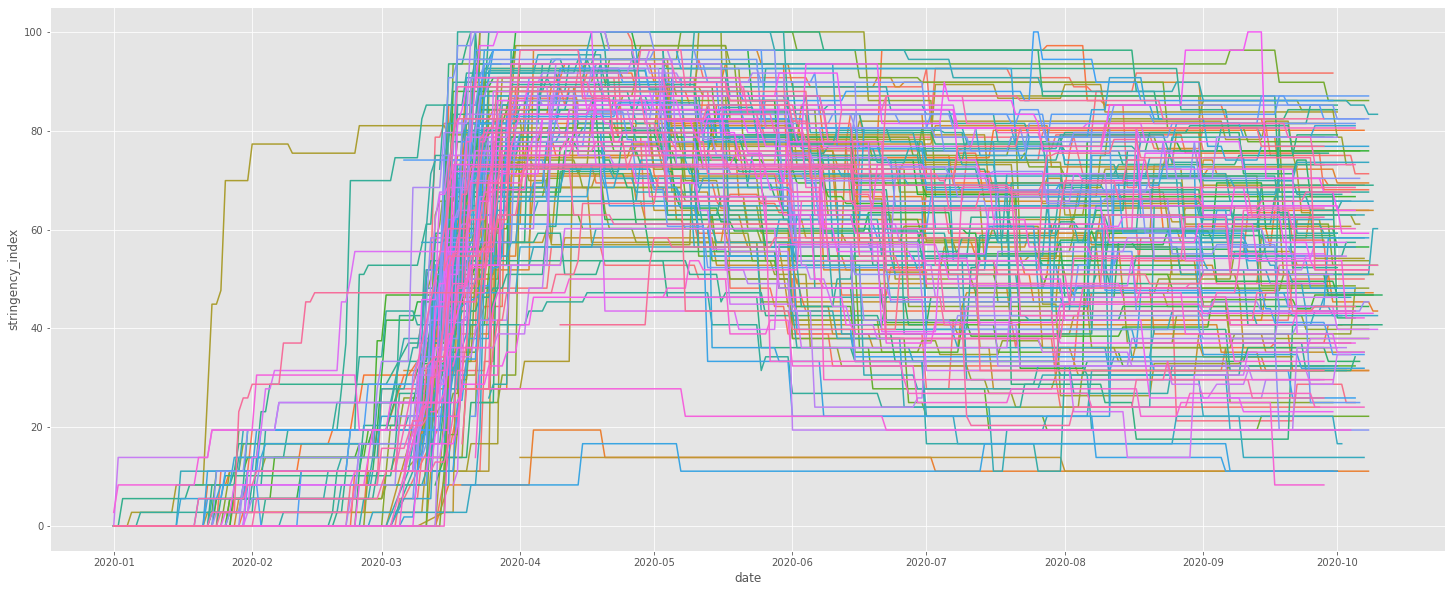

In [122]:
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.lineplot(data=df, x='date', y='stringency_index', hue='iso_code')
g.legend_.remove()

Great, looks useful!  Since the global response to COVID is predicated on these measures, we should theoretically be able to see 2 things in the data; 1) that more stringent measures lead to a lower death rate and 2) that the earlier these are put into place, the bigger the reduction in death rate.  Let's test these theories!

<AxesSubplot:xlabel='iso_code'>

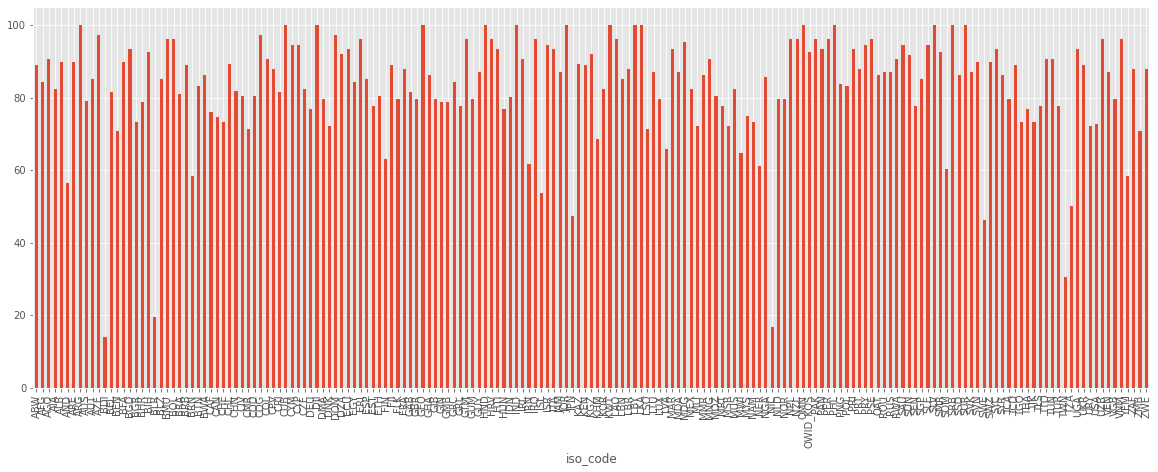

In [123]:
fig, ax = plt.subplots(figsize=(20, 7))
df.groupby('iso_code').stringency_index.max().plot(kind='bar')

<AxesSubplot:xlabel='iso_code'>

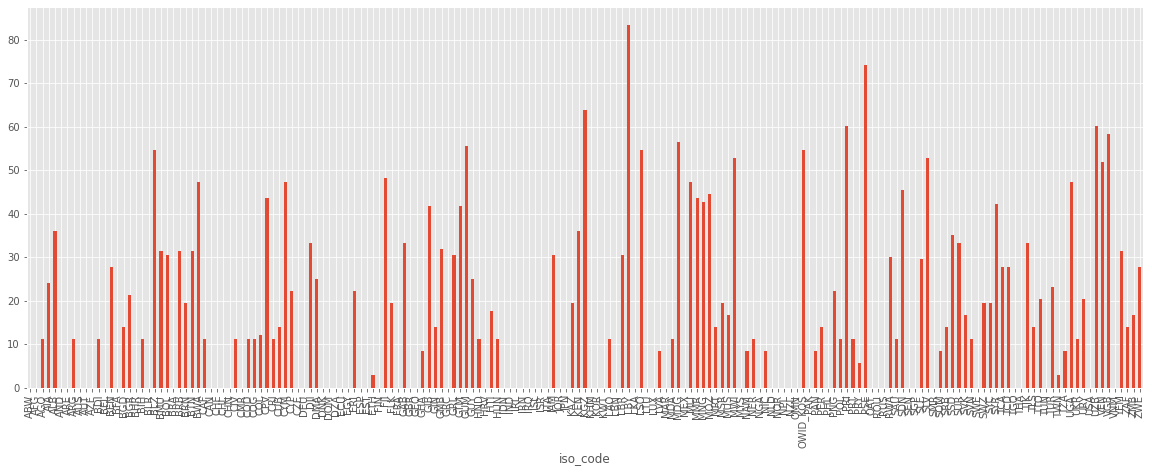

In [124]:
fig, ax = plt.subplots(figsize=(20, 7))
df.groupby('iso_code').stringency_index.min().plot(kind='bar')

<AxesSubplot:xlabel='iso_code'>

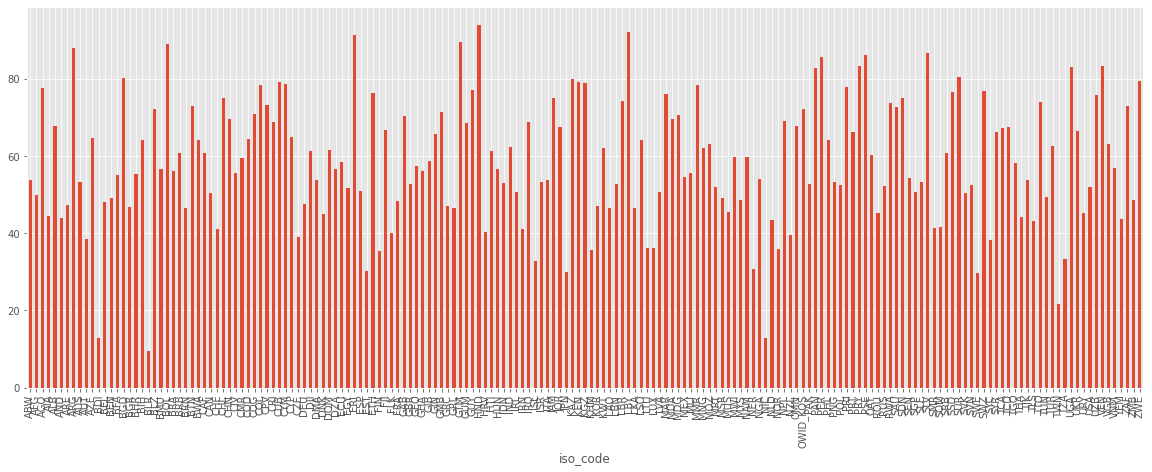

In [125]:
fig, ax = plt.subplots(figsize=(20, 7))
df.groupby('iso_code').stringency_index.mean().plot(kind='bar')

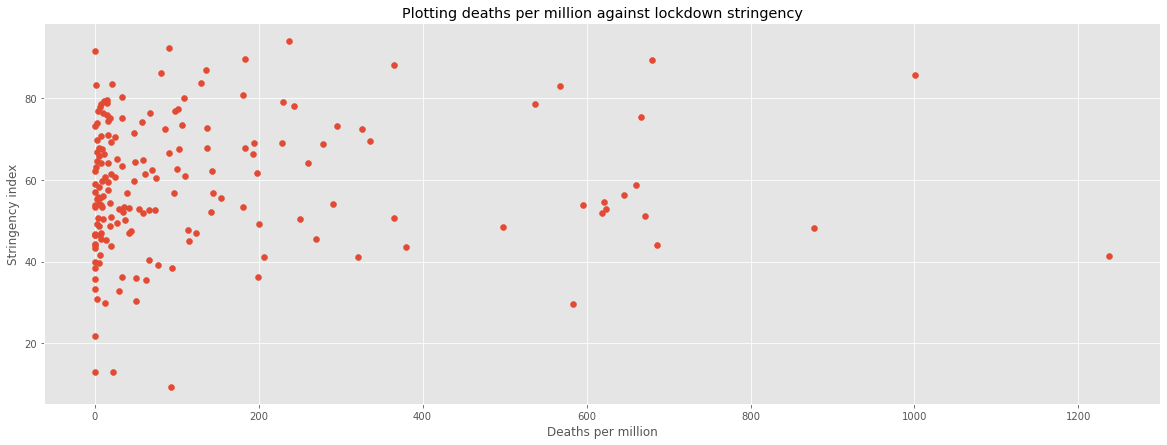

In [132]:
grouped_mean_stringency = df.groupby('iso_code').stringency_index.mean()
grouped_max_deaths = df.groupby('iso_code').total_deaths_per_million.max()

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(grouped_max_deaths, grouped_mean_stringency)
plt.xlabel('Deaths per million')
plt.ylabel('Stringency index')
plt.title('Plotting deaths per million against lockdown stringency')
plt.show()

Well this is far from clear, there appears to be no relationship.  Let's see if getting rid of the outliers helps at all.

In [139]:
minus_outliers = grouped_max_deaths[grouped_max_deaths < 400]
stringency_minus_outliers = grouped_mean_stringency[minus_outliers.index]

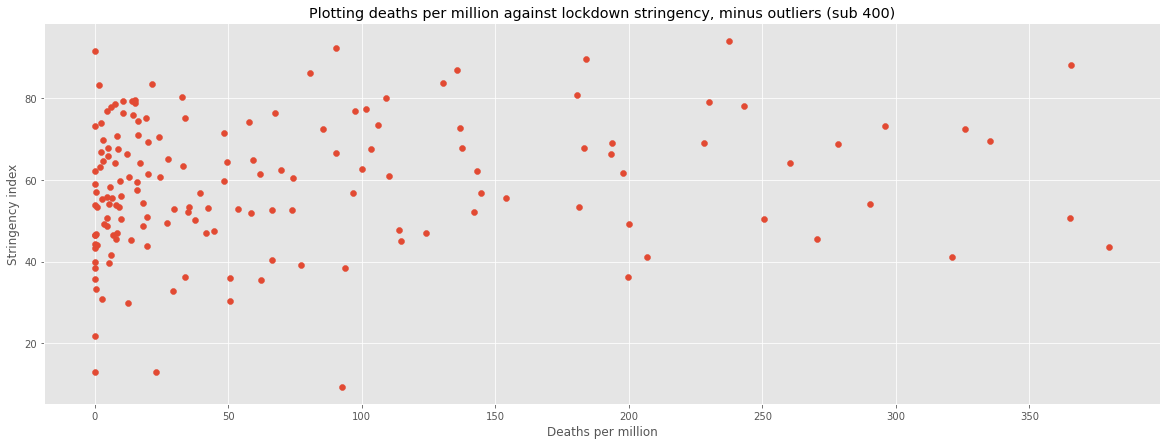

In [140]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(minus_outliers, stringency_minus_outliers)
plt.xlabel('Deaths per million')
plt.ylabel('Stringency index')
plt.title('Plotting deaths per million against lockdown stringency, minus outliers (sub 400)')
plt.show()

Looks pretty random.  Let's now try analysing whether early lockdowns helped.  We'll classify the countries into 2 groups initially, those who had a 100% stringency index by end April 2020, and those who didn't.

In [161]:
early_set = set(df[(df.date < '2020-05-01') & (df.stringency_index == 100)].iso_code)
early_set

{'ARG', 'DJI', 'GEO', 'HND', 'IND', 'JOR', 'LBY', 'LKA', 'PHL', 'SRB'}

In [166]:
df['early_set'] = 0
for country in early_set:
    df.loc[df.iso_code == country, 'early_set'] = 1


0    38118
1     2311
Name: early_set, dtype: int64

In [172]:
newdf = pd.DataFrame({'deaths': grouped_max_deaths, 'stringency_index':grouped_mean_stringency, 'early_lockdown':df.groupby('iso_code').early_set.mean()}, index=grouped_max_deaths.index)
newdf

,deaths,stringency_index,early_lockdown
iso_code,,,
ABW,290.355,53.965323,0
AFG,37.556,50.075465,0
AGO,6.268,77.841144,0
AIA,0.000,44.397297,0
ALB,137.605,67.753460,0
...,...,...,...
VNM,0.360,56.939137,0
YEM,19.714,43.828837,0
ZAF,295.859,73.173502,0


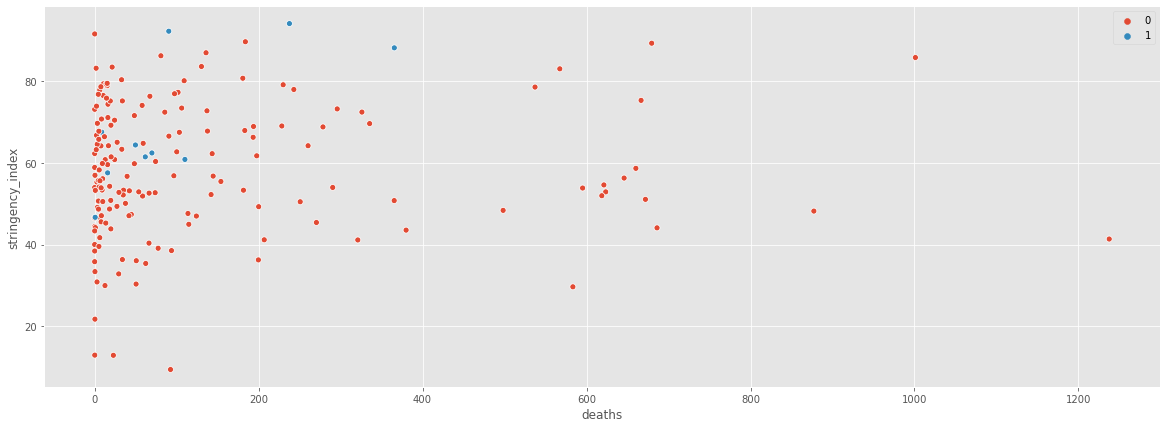

In [175]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.scatterplot(data=newdf, x='deaths', y='stringency_index', hue=newdf.early_lockdown.to_list())
plt.show()

Not terribly conclusive either.  Let's try adding a third group - those who never went above a 75% stringency index, to compare

In [184]:
laissez = df.groupby('iso_code').stringency_index.max() <= 75
laissez = set(laissez[laissez == True].index)
laissez

{'AND',
 'BDI',
 'BEN',
 'BGR',
 'BLR',
 'BRN',
 'CAN',
 'CHE',
 'CMR',
 'DNK',
 'FIN',
 'IRN',
 'ISL',
 'JPN',
 'KHM',
 'LSO',
 'LVA',
 'MLI',
 'MSR',
 'MWI',
 'MYS',
 'NAM',
 'NER',
 'NIC',
 'SOM',
 'SWE',
 'TGO',
 'TJK',
 'TWN',
 'TZA',
 'URY',
 'USA',
 'YEM',
 'ZMB'}

In [187]:
for country in laissez:
    df.loc[df.iso_code == country, 'early_set'] = -1

newdf = pd.DataFrame({'deaths': grouped_max_deaths, 'stringency_index':grouped_mean_stringency, 'early_lockdown':df.groupby('iso_code').early_set.mean()}, index=grouped_max_deaths.index)
newdf

,deaths,stringency_index,early_lockdown
iso_code,,,
ABW,290.355,53.965323,0
AFG,37.556,50.075465,0
AGO,6.268,77.841144,0
AIA,0.000,44.397297,0
ALB,137.605,67.753460,0
...,...,...,...
VNM,0.360,56.939137,0
YEM,19.714,43.828837,-1
ZAF,295.859,73.173502,0


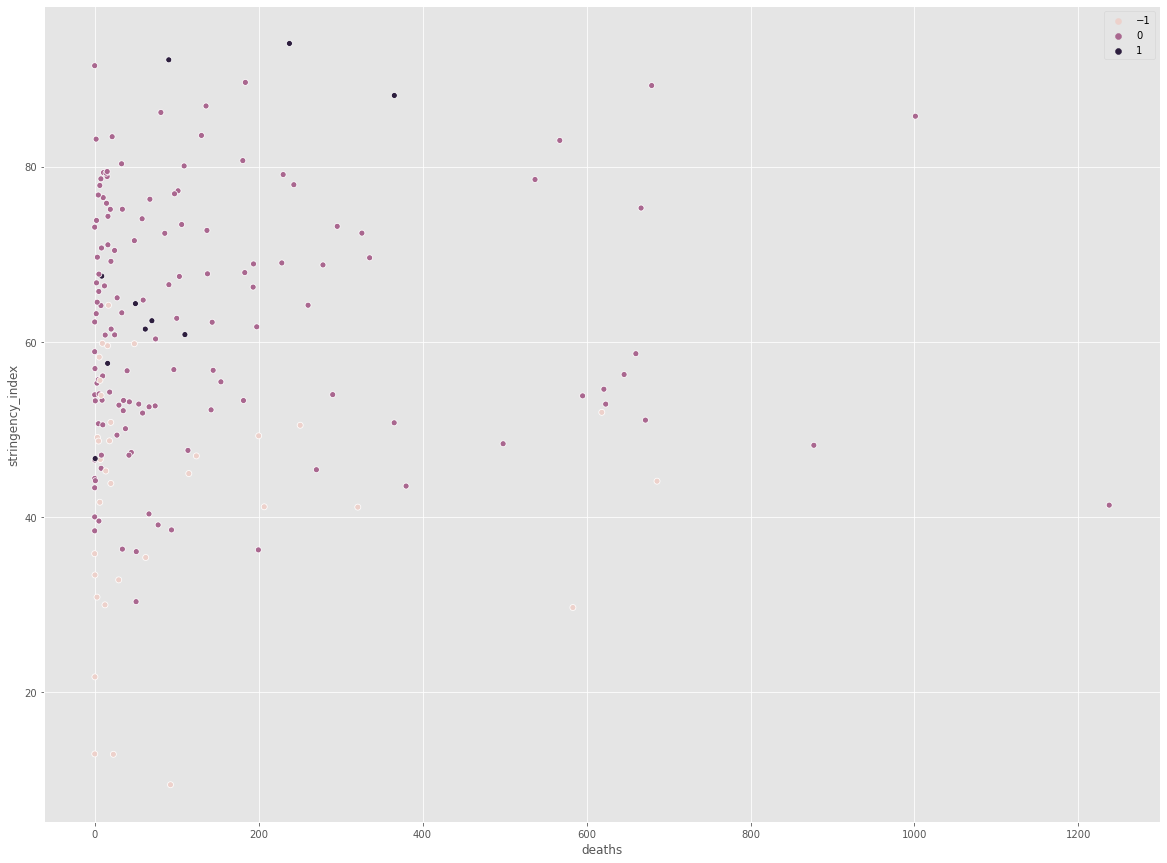

In [189]:
fig, ax = plt.subplots(figsize=(20,15))
sns.scatterplot(data=newdf, x='deaths', y='stringency_index', hue=newdf.early_lockdown.to_list())
plt.show()

If anything, this is invalidating the initial theory further, but bolstering the case for lockdowns being in reaction to a problem with deaths. Perhaps we should look at whether lockdown affected the rate of new deaths in all 3 categories.

In [199]:
df = df.drop('early_lockdown', axis=1)
df

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density,early_set
0,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.000,0.000,0.00,54.422,0
1,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.000,0.000,0.00,54.422,0
2,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.000,0.000,0.00,54.422,0
3,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.000,0.000,0.00,54.422,0
4,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.000,0.000,0.00,54.422,0
...,...,...,...,...,...,...,...,...,...,...,...
40424,ZWE,Africa,Zimbabwe,2020-09-24,7725.0,227.0,519.750,15.273,76.85,42.729,0
40425,ZWE,Africa,Zimbabwe,2020-09-25,7752.0,227.0,521.566,15.273,76.85,42.729,0
40426,ZWE,Africa,Zimbabwe,2020-09-26,7787.0,227.0,523.921,15.273,76.85,42.729,0
40427,ZWE,Africa,Zimbabwe,2020-09-27,7803.0,227.0,524.998,15.273,76.85,42.729,0


In [200]:
tempdf = pd.read_csv('/Users/josevans/Downloads/owid-covid-data.csv', low_memory=False)['new_deaths_per_million']

tempdf

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49432    NaN
49433    NaN
49434    NaN
49435    NaN
49436    NaN
Name: new_deaths_per_million, Length: 49437, dtype: float64

In [201]:
tempdf = df.merge(tempdf, left_index=True, right_index=True)
tempdf

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density,early_set,new_deaths_per_million
0,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.000,0.000,0.00,54.422,0,0.000
1,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.000,0.000,0.00,54.422,0,0.000
2,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.000,0.000,0.00,54.422,0,0.000
3,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.000,0.000,0.00,54.422,0,0.000
4,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.000,0.000,0.00,54.422,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
40424,ZWE,Africa,Zimbabwe,2020-09-24,7725.0,227.0,519.750,15.273,76.85,42.729,0,0.000
40425,ZWE,Africa,Zimbabwe,2020-09-25,7752.0,227.0,521.566,15.273,76.85,42.729,0,0.063
40426,ZWE,Africa,Zimbabwe,2020-09-26,7787.0,227.0,523.921,15.273,76.85,42.729,0,0.000
40427,ZWE,Africa,Zimbabwe,2020-09-27,7803.0,227.0,524.998,15.273,76.85,42.729,0,0.126


In [202]:
filtered = tempdf[tempdf.early_set != 0]
filtered

,iso_code,continent,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,stringency_index,population_density,early_set,new_deaths_per_million
750,AND,Europe,Andorra,2020-03-03,1.0,0.0,12.942,0.000,0.00,163.755,-1,0.160
751,AND,Europe,Andorra,2020-03-14,2.0,0.0,25.885,0.000,20.37,163.755,-1,0.137
752,AND,Europe,Andorra,2020-03-16,5.0,0.0,64.712,0.000,31.48,163.755,-1,0.182
753,AND,Europe,Andorra,2020-03-17,14.0,0.0,181.195,0.000,31.48,163.755,-1,0.228
754,AND,Europe,Andorra,2020-03-18,14.0,0.0,181.195,0.000,31.48,163.755,-1,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...
40232,ZMB,Africa,Zambia,2020-10-01,14759.0,332.0,802.820,18.059,44.44,22.995,-1,0.000
40233,ZMB,Africa,Zambia,2020-10-02,14802.0,333.0,805.159,18.114,44.44,22.995,-1,0.000
40234,ZMB,Africa,Zambia,2020-10-03,14830.0,333.0,806.682,18.114,44.44,22.995,-1,0.000
40235,ZMB,Africa,Zambia,2020-10-04,14974.0,333.0,814.515,18.114,44.44,22.995,-1,0.000


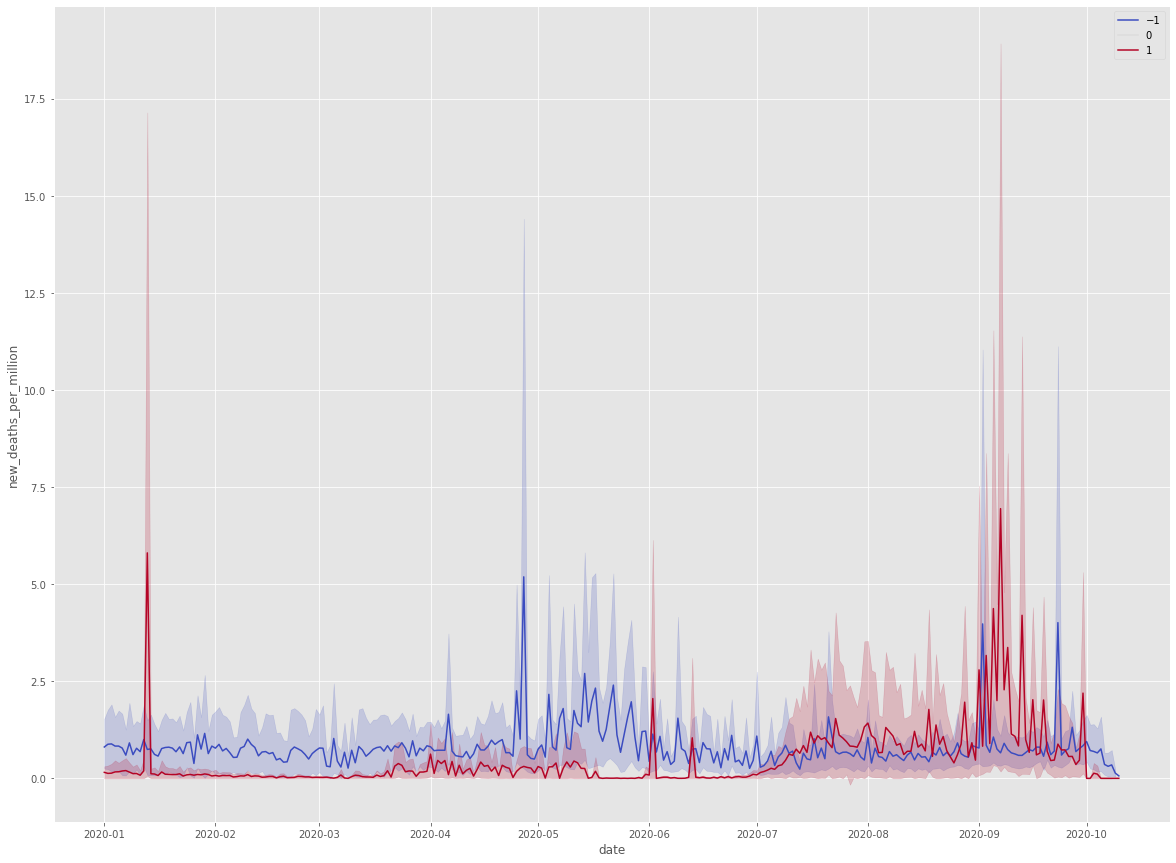

In [207]:
g = plt.subplots(figsize=(20,15))
g = sns.color_palette("hls", 8)
sns.lineplot(data=filtered, x='date', y='new_deaths_per_million', hue=filtered.early_set.to_list(), palette='coolwarm')
plt.show()

## Conclusion

Now THIS is absolutely fascinating.  It appears that those countries which locked down early saw an initial reduction in deaths versus the laissez-faire approach, BUT in the second wave are having a significantly worse outcome, meaning that the lockdown approach merely delays the inevitable from COVID, versus preventing harm. It implies that the herd immunity approach is likely correct. 

Given the absolutely huge economic, social and health costs of lockdowns then, it would appear that, from an initial read of this data at least, they don't make sense from a societal perspective.